In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
rng = np.random

In [3]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
pred = tf.add(tf.mul(X,W), b)

In [7]:
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
init = tf.initialize_all_variables()

epoch: 0050 cost: 0.077336453 W: 0.260212  : 0.725078
epoch: 0100 cost: 0.077295668 W: 0.259581  : 0.729621
epoch: 0150 cost: 0.077259623 W: 0.258986  : 0.733895
epoch: 0200 cost: 0.077227801 W: 0.258428  : 0.737914
epoch: 0250 cost: 0.077199712 W: 0.257902  : 0.741695
epoch: 0300 cost: 0.077174887 W: 0.257408  : 0.745252
epoch: 0350 cost: 0.077152997 W: 0.256943  : 0.748596
epoch: 0400 cost: 0.077133626 W: 0.256506  : 0.751741
epoch: 0450 cost: 0.077116549 W: 0.256095  : 0.754699
epoch: 0500 cost: 0.077101499 W: 0.255708  : 0.757482
epoch: 0550 cost: 0.077088214 W: 0.255344  : 0.760099
epoch: 0600 cost: 0.077076480 W: 0.255002  : 0.76256
epoch: 0650 cost: 0.077066116 W: 0.25468  : 0.764877
epoch: 0700 cost: 0.077057004 W: 0.254377  : 0.767053
epoch: 0750 cost: 0.077048957 W: 0.254093  : 0.769101
epoch: 0800 cost: 0.077041849 W: 0.253825  : 0.771027
epoch: 0850 cost: 0.077035606 W: 0.253573  : 0.772839
epoch: 0900 cost: 0.077030107 W: 0.253336  : 0.774543
epoch: 0950 cost: 0.077025220 

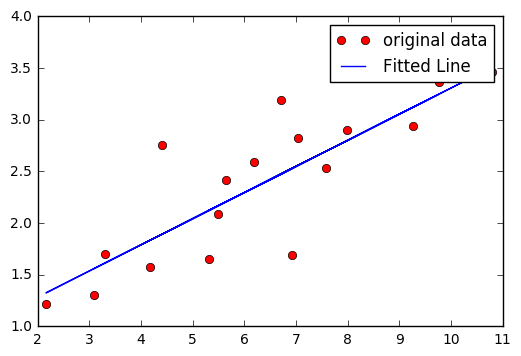

In [14]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for x, y in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if (epoch+1) % display_step == 0:
            c = sess.run(cost,feed_dict={X:train_X, Y:train_Y})
            print("epoch: "+ "%04d"%(epoch+1) + " cost: "+"{:.9f}".format(c) +" W: "+str(sess.run(W))," : "+str(sess.run(b)))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost : ", str(training_cost)+ " W: "+str(sess.run(W)), " b: "+str(sess.run(b)))
    
    plt.plot(train_X, train_Y, 'ro', label ="original data")
    plt.plot(train_X, sess.run(W)* train_X +sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()